In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 7

In [2]:
df = pd.read_csv('7_total_loan_costs.csv', low_memory=False)

In [3]:
# Print the value counts for the filtered DataFrame
print("Value counts for race after filtering:")
print(df['applicant_race_1'].value_counts())
print(df['co_applicant_race_1'].value_counts())

print("Value counts for ethnicity after filtering:")
print(df['applicant_ethnicity_1'].value_counts())
print(df['co_applicant_ethnicity_1'].value_counts())

Value counts for race after filtering:
applicant_race_1
5.0    48540
3.0     2813
Name: count, dtype: int64
co_applicant_race_1
5.0    48553
3.0     2800
Name: count, dtype: int64
Value counts for ethnicity after filtering:
applicant_ethnicity_1
2.0    45778
1.0     5575
Name: count, dtype: int64
co_applicant_ethnicity_1
2.0    45569
1.0     5784
Name: count, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51353 entries, 0 to 51352
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              51297 non-null  float64
 1   action_taken                              51353 non-null  int64  
 2   loan_type                                 51353 non-null  int64  
 3   lien_status                               51353 non-null  int64  
 4   reverse_mortgage                          51353 non-null  int64  
 5   open_end_line_of_credit                   51353 non-null  int64  
 6   loan_amount                               51353 non-null  int64  
 7   combined_loan_to_value_ratio              51353 non-null  object 
 8   interest_rate                             51353 non-null  object 
 9   total_loan_costs                          51353 non-null  object 
 10  origination_charges               

In [5]:
print(df['origination_charges'].value_counts())

origination_charges
0.00       6546
1205.00     795
1330.00     619
1130.00     538
80.00       465
           ... 
131.01        1
6565.00       1
416.55        1
363.25        1
591.50        1
Name: count, Length: 9133, dtype: int64


Origination charges may include various fees and costs, such as:

- Application Fee: A fee to cover the cost of processing your loan application.
- Underwriting Fee: This fee covers the cost of evaluating your creditworthiness and determining if you qualify for the loan.
- Loan Origination Fee: This is a fee charged by the lender for originating the loan. It is often a percentage of the loan amount.
- Points: Borrowers may pay points to lower their interest rate. Each point is equal to 1% of the loan amount.
- Processing Fee: This fee covers the cost of processing your loan, including documentation and verification.
- Document Preparation Fee: A fee for preparing loan documents.
- Credit Report Fee: The cost of obtaining a credit report to assess your credit history.
- Appraisal Fee: The cost of having a professional appraiser assess the value of the property being financed.
- Title Search and Title Insurance: Fees for researching the property's title and providing insurance to protect against title defects.
- Flood Certification Fee: A fee to determine if the property is in a flood zone.

In [6]:
unique_categories = df['origination_charges'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 9133


In [7]:
# First, convert the 'origination_charges' column to numeric (float)
df['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['origination_charges'].min()
maximum_interest_rate = df['origination_charges'].max()
median_interest_rate = df['origination_charges'].median()

print("Minimum origination_charges:", minimum_interest_rate)
print("Maximum origination_charges:", maximum_interest_rate)
print("Median origination_charges:", median_interest_rate)

Minimum origination_charges: 0.0
Maximum origination_charges: 8896.13
Median origination_charges: 1130.0


In [8]:
# Find the top 5 rows with the highest origination charges
top_1_max_origination = df.nlargest(1, 'origination_charges')

# Print the result
top_1_max_origination

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_sex,co_applicant_sex,applicant_age,co_applicant_age
41291,6.067009e+09,1,1,1,2,2,505000,85.0-90.0,3.5-4.0,8500-9000,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,3,2


# Check outliers

In [9]:
# Convert the 'origination_charges' column to numeric (float)
df['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['origination_charges'].quantile(0.25)
Q3 = df['origination_charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['origination_charges'] < lower_bound) | (df['origination_charges'] > upper_bound)]

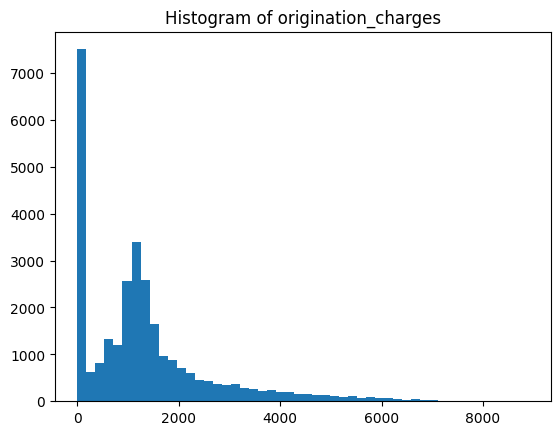

In [10]:
plt.hist(df['origination_charges'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of origination_charges')
plt.show()

[    nan 1130.   1079.   ... 3602.56 3085.6   591.5 ]
21719


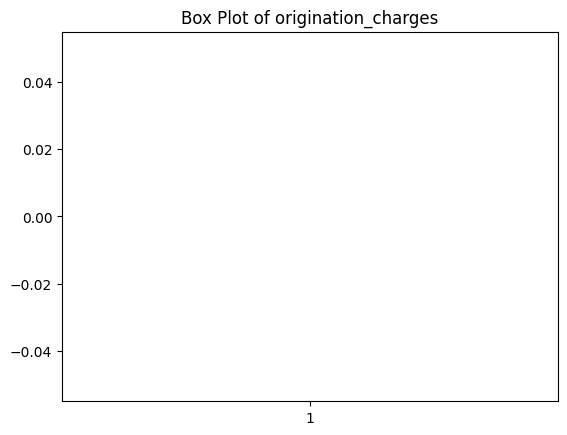

In [11]:
df1 = df.copy()
df1['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')

print(df['origination_charges'].unique())
print(df['origination_charges'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['origination_charges'])
plt.title('Box Plot of origination_charges')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

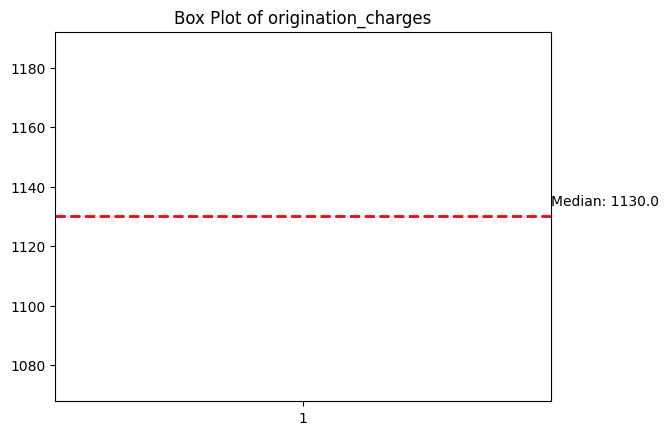

In [12]:
import matplotlib.pyplot as plt

# Create a box plot of the 'origination_charges' column
plt.boxplot(df1['origination_charges'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of origination_charges')

# Calculate the median value
median_value = df1['origination_charges'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

this median seems more normal!
we have to remove outliers.

# Remove outliers

In [13]:
# Calculate the IQR for origination_charges
Q1 = df1['origination_charges'].quantile(0.25)
Q3 = df1['origination_charges'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['origination_charges'] < lower_bound) | (df1['origination_charges'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 1658


In [14]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [15]:
# Display the values of the removed outliers
print(outliers_df['origination_charges'])

21802    4343.75
21808    4071.50
21809    4340.00
21822    6167.89
21827    5100.00
          ...   
51312    4145.00
51319    4990.00
51330    4093.44
51336    6430.00
51340    4097.50
Name: origination_charges, Length: 1658, dtype: float64


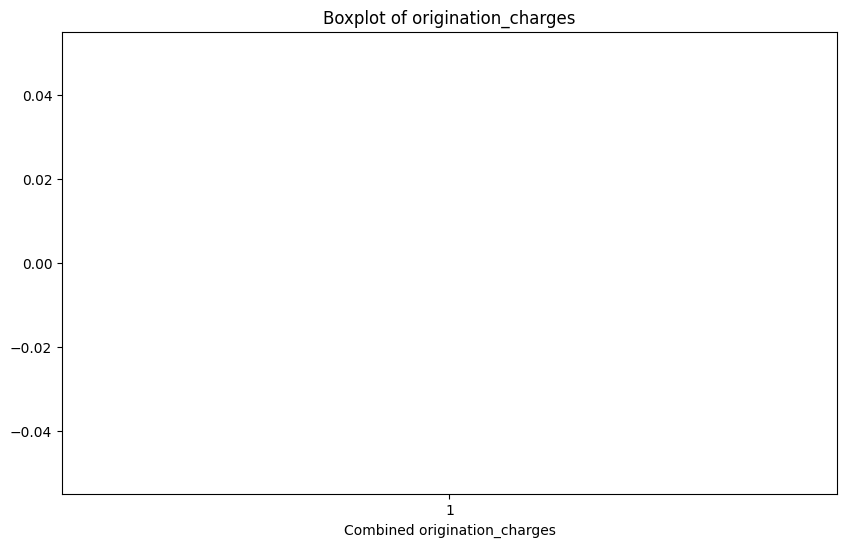

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['origination_charges'])
plt.title('Boxplot of origination_charges')
plt.xlabel('Combined origination_charges')
plt.show()

In [17]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'origination_charges'] = pd.to_numeric(df_no_outliers['origination_charges'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['origination_charges'].min()
maximum_interest_rate = df_no_outliers['origination_charges'].max()
median_interest_rate = df_no_outliers['origination_charges'].median()

print("Minimum origination_charges:", minimum_interest_rate)
print("Maximum origination_charges:", maximum_interest_rate)
print("Median origination_charges:", median_interest_rate)

Minimum origination_charges: 0.0
Maximum origination_charges: 4025.0
Median origination_charges: 1055.0


In [18]:
print(df_no_outliers['origination_charges'].value_counts())

origination_charges
0.00       6546
1205.00     795
1330.00     619
1130.00     538
80.00       465
           ... 
131.01        1
416.55        1
363.25        1
763.08        1
591.50        1
Name: count, Length: 7712, dtype: int64


In [19]:
# Remove categories below 100 entries.

#threshold = 100
#counts = df_no_outliers['origination_charges'].value_counts()
#values_to_remove = counts[counts < threshold].index
#df_filtered = df_no_outliers[~df_no_outliers['origination_charges'].isin(values_to_remove)]


# Make range categories

In [20]:
new_df = df_no_outliers.copy()

# Define a function to categorize 'origination_charges' into the desired ranges
def categorize_origination_charges(cost):
    # Define a list of upper bounds for the ranges
    upper_bounds = [500 * i for i in range(1, 41)]  # Generates ranges up to 8000 in increments of 200
    labels = [f'{lower}-{upper}' for lower, upper in zip([0] + upper_bounds, upper_bounds)]
    
    # Find the appropriate range for 'origination_charges' and return the label
    for label, upper_bound in zip(labels, upper_bounds):
        if cost <= upper_bound:
            return label
    return 'Other'

# Apply the categorization function to 'origination_charges' column
new_df['origination_charges'] = new_df['origination_charges'].apply(categorize_origination_charges)

# Print the result
print(new_df['origination_charges'].value_counts())

origination_charges
Other        21719
0-500         8779
1000-1500     7929
500-1000      4263
1500-2000     2734
2000-2500     1619
2500-3000     1104
3000-3500      878
3500-4000      643
4000-4500       27
Name: count, dtype: int64


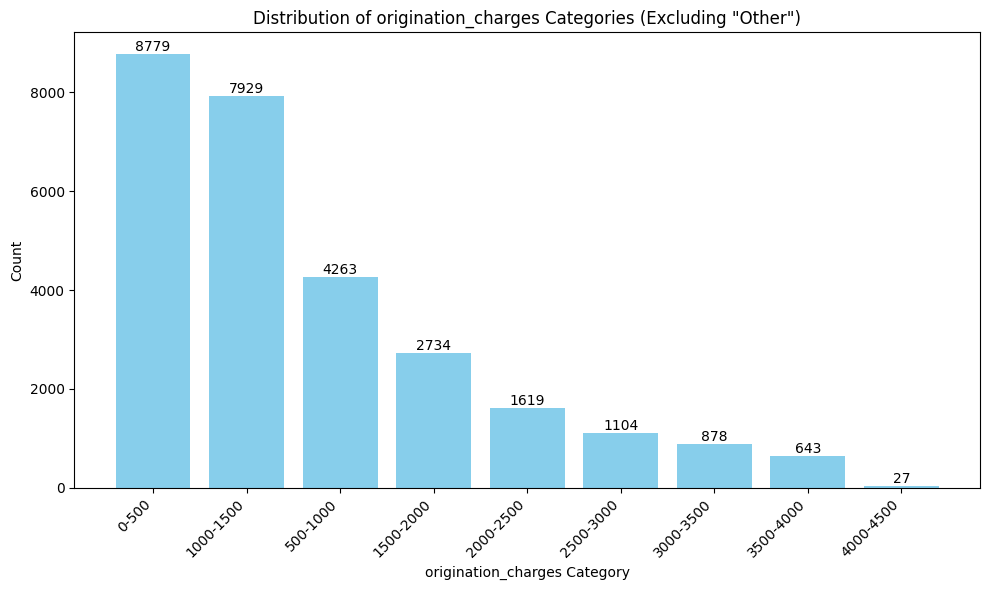

In [21]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['origination_charges'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['origination_charges'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('origination_charges Category')
plt.ylabel('Count')
plt.title('Distribution of origination_charges Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
new_df.to_csv('8_origination_charges.csv', index=False)